In [262]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pt
import json
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', -1)

In [458]:
import pickle
df = pd.read_pickle("projectData/authorExperienceMatrix.p")
dF = pd.DataFrame(df.items())
dF.columns= ["name", "experience"]
dF[['name','commits']]= pd.DataFrame(dF.name.tolist(), index=dF.index)
experienceCommits = dF

In [598]:
df = pd.read_pickle("projectData/defectAuthorMatrix.p")
dF = pd.DataFrame(df, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])


In [600]:
hdfsMatrix = pd.read_pickle("projectData/defectAuthorMatrixForHDFS.p")
hdfs = pd.DataFrame(hdfsMatrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])


In [606]:
hdfs2000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForHDFS2000.p")
hdfs2000 = pd.DataFrame(hdfs2000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [607]:
dF=pd.concat([dF, hdfs, hdfs2000])

In [608]:
implicatedList = dF['implicated'].tolist()
# # dF[['name','commits']]= pd.DataFrame(dF.name.tolist(), index=dF.index)

tempList=[]
commits=experienceCommits['commits'].tolist()
for x in commits:
    if x in implicatedList:
        tempList.append([x, True])
    else:
        tempList.append([x, False])
        

s=pd.DataFrame(tempList, columns=['commit', 'buggy'])
experienceCommits[['buggy']]=pd.DataFrame(s['buggy'])
experienceCommits['buggy'] = experienceCommits.buggy.astype(int)

/Users/faizank/workspace/jupyter/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


author name Haohui Mai
author name Tsz-wo Sze
author name Jing Zhao
author name Arpit Agarwal
author name Suresh Srinivas
author name Alejandro Abdelnur
author name Todd Lipcon
author name Andrew Wang
author name Colin Patrick Mccabe
author name cnauroth


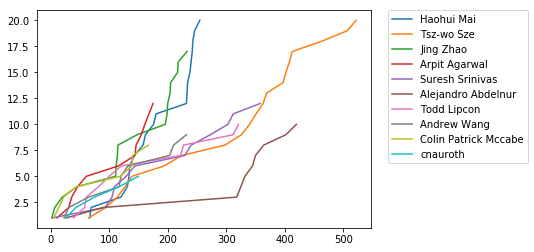

In [609]:
data= dF.groupby('author')['implicated'].nunique()
authorDf = pd.DataFrame(data)
topBugyContributers= authorDf.implicated.nlargest(10)
topBugyContributers
tempBuggy=[]
for author in topBugyContributers.index:
    tempBuggy= experienceCommits.loc[(experienceCommits['name']==author) & (experienceCommits["buggy"]==1)]
    tempDf = pd.DataFrame(tempBuggy['buggy'].cumsum())
#     tempBuggy[['cumBuggy']]=0
    tempBuggy[['cumBuggy']]= tempDf
    print("author name", author)
    pt.plot(tempBuggy['experience'], tempBuggy['cumBuggy'], label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    

[ 0.   2.5  5.   7.5 10.  12.5 15.  17.5 20. ] <a list of 9 Text yticklabel objects>


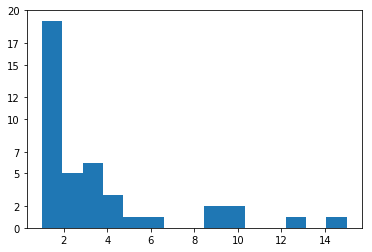

In [604]:
import math
authorDf.implicated.hist(bins=15, grid=False)
locs, label= pt.yticks()
print(locs, label)
yint=[]
for each in locs:
    yint.append(int(each))
pt.yticks(yint)


pt.savefig('histDefects.pdf', bbox_inches="tight")